<a href="https://colab.research.google.com/github/QueWu030306/learning-bioinformatics-at-home/blob/master/ERnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ERnet Transformer

# Table of Contents

- [1. Install packages](#install)
- [2. Download files](#download)
- [3. Functions](#functions)
- [4. Inference](#inference)
    - [a. Single images](#single)
    - [b. Batch processing](#batch)

<a id='install'></a>
## 1. Install packages

In [1]:
!pip install sknw timm einops

<a id='download'></a>
## 2. Download files

In [2]:
# architectures
!mkdir -p archs
!wget https://raw.githubusercontent.com/charlesnchr/ERnet-v2/main/Training/archs/swinir_rcab_arch.py -P Training/archs
!wget https://raw.githubusercontent.com/charlesnchr/ERnet-v2/main/Training/archs/rcan_arch.py -P Training/archs

# inference code
!wget https://raw.githubusercontent.com/charlesnchr/ERnet-v2/main/Inference/model_evaluation.py -P Inference
!wget https://raw.githubusercontent.com/charlesnchr/ERnet-v2/main/Inference/graph_processing.py -P Inference

# models
!mkdir -p models
!wget https://github.com/charlesnchr/ERnet-v2/releases/download/v2.0/20220306_ER_4class_swinir_nch1.pth -P models

# image files
!mkdir -p images
!wget https://github.com/charlesnchr/ERnet-v2/releases/download/v2.0/TestImage1.png -P images
!wget https://github.com/charlesnchr/ERnet-v2/releases/download/v2.0/TestImage2.png -P images
!wget https://github.com/charlesnchr/ERnet-v2/releases/download/v2.0/TestImage3-stack.tif -P images
!wget https://github.com/charlesnchr/ERnet-v2/releases/download/v2.0/TestImage4-stack.tif -P images

--2025-12-01 14:53:57--  https://raw.githubusercontent.com/charlesnchr/ERnet-v2/main/Training/archs/swinir_rcab_arch.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50102 (49K) [text/plain]
Saving to: ‘Training/archs/swinir_rcab_arch.py’

swinir_rcab_arch.py 100%[===================>]  48.93K  --.-KB/s    in 0.001s  

2025-12-01 14:53:58 (77.7 MB/s) - ‘Training/archs/swinir_rcab_arch.py’ saved [50102/50102]

--2025-12-01 14:53:58--  https://raw.githubusercontent.com/charlesnchr/ERnet-v2/main/Training/archs/rcan_arch.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request se

<a id='functions'></a>
# 3. Functions

In [5]:
import os
import datetime
import math
import time
from skimage import io
import os
from argparse import Namespace
import sys

# Load code from repository (ERnet architecture + inference code)
dirs = ["Training/archs", "Inference"]
[sys.path.append(os.path.abspath(f)) for f in dirs]
from Inference import model_evaluation


def segment(
    exportdir,
    filepaths,
    weka_colours,
    stats_tubule_sheet,
    graph_metrics,
    save_in_original_folders,
    save_input=True,
):
    opt = Namespace()
    opt.root = filepaths
    opt.ext = ["jpg", "png", "tif"]
    opt.stats_tubule_sheet = stats_tubule_sheet
    opt.graph_metrics = graph_metrics
    opt.weka_colours = weka_colours
    opt.save_input = save_input

    opt.exportdir = exportdir
    os.makedirs(exportdir, exist_ok=True)
    opt.jobname = datetime.datetime.utcnow().strftime("%Y%m%d%H%M%S%f")[:-3]

    if stats_tubule_sheet:
        csvfid_path = "%s/%s_stats_tubule_sheet.csv" % (opt.exportdir, opt.jobname)
        opt.csvfid = open(csvfid_path, "w")

    if opt.graph_metrics:
        graphfid_path = "%s/%s_graph_metrics.csv" % (opt.exportdir, opt.jobname)
        opt.graphfid = open(graphfid_path, "w")

    ## model specific
    opt.imageSize = 600
    opt.n_resblocks = 10
    opt.n_resgroups = 3
    opt.n_feats = 64
    opt.reduction = 16
    opt.narch = 0
    opt.norm = None
    opt.nch_in = 1
    opt.nch_out = 4
    opt.cpu = False
    opt.weights = model
    opt.scale = 1

    if save_in_original_folders:
        opt.out = "root"

    print(vars(opt))

    return model_evaluation.EvaluateModel(opt)

<a id='inference'></a>
# 4. Inference

<a id='single'></a>
## a. Example of using ERnet Transformer on single images

In [8]:
exportdir = 'output'
filepaths = ['images/TestImage1.png','images/TestImage2.png']
model = 'models/20220306_ER_4class_swinir_nch1.pth'
weka_colours = False
stats_tubule_sheet = True
graph_metrics = True
save_in_original_folders = True
outpaths = segment(exportdir,filepaths,weka_colours,stats_tubule_sheet,graph_metrics,save_in_original_folders,model)

/tmp/ipython-input-1725556100.py:35: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  opt.jobname = datetime.datetime.utcnow().strftime("%Y%m%d%H%M%S%f")[:-3]
/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


{'root': ['images/TestImage1.png', 'images/TestImage2.png'], 'ext': ['jpg', 'png', 'tif'], 'stats_tubule_sheet': True, 'graph_metrics': True, 'weka_colours': False, 'save_input': 'models/20220306_ER_4class_swinir_nch1.pth', 'exportdir': 'output', 'jobname': '20251201145516744', 'csvfid': <_io.TextIOWrapper name='output/20251201145516744_stats_tubule_sheet.csv' mode='w' encoding='utf-8'>, 'graphfid': <_io.TextIOWrapper name='output/20251201145516744_graph_metrics.csv' mode='w' encoding='utf-8'>, 'imageSize': 600, 'n_resblocks': 10, 'n_resgroups': 3, 'n_feats': 64, 'reduction': 16, 'narch': 0, 'norm': None, 'nch_in': 1, 'nch_out': 4, 'cpu': False, 'weights': 'models/20220306_ER_4class_swinir_nch1.pth', 'scale': 1, 'out': 'root'}
LOADING: Transformer architecture
loading checkpoint models/20220306_ER_4class_swinir_nch1.pth


  0%|          | 0/2 [00:00<?, ?it/s]

Saved ['images/TestImage1_out_0000.png', 'images/TestImage1_graph.png', 'images/TestImage1_hist.png', 'images/TestImage2_out_0001.png', 'images/TestImage2_graph.png', 'images/TestImage2_hist.png']


### Visualise result

<Figure size 640x480 with 0 Axes>

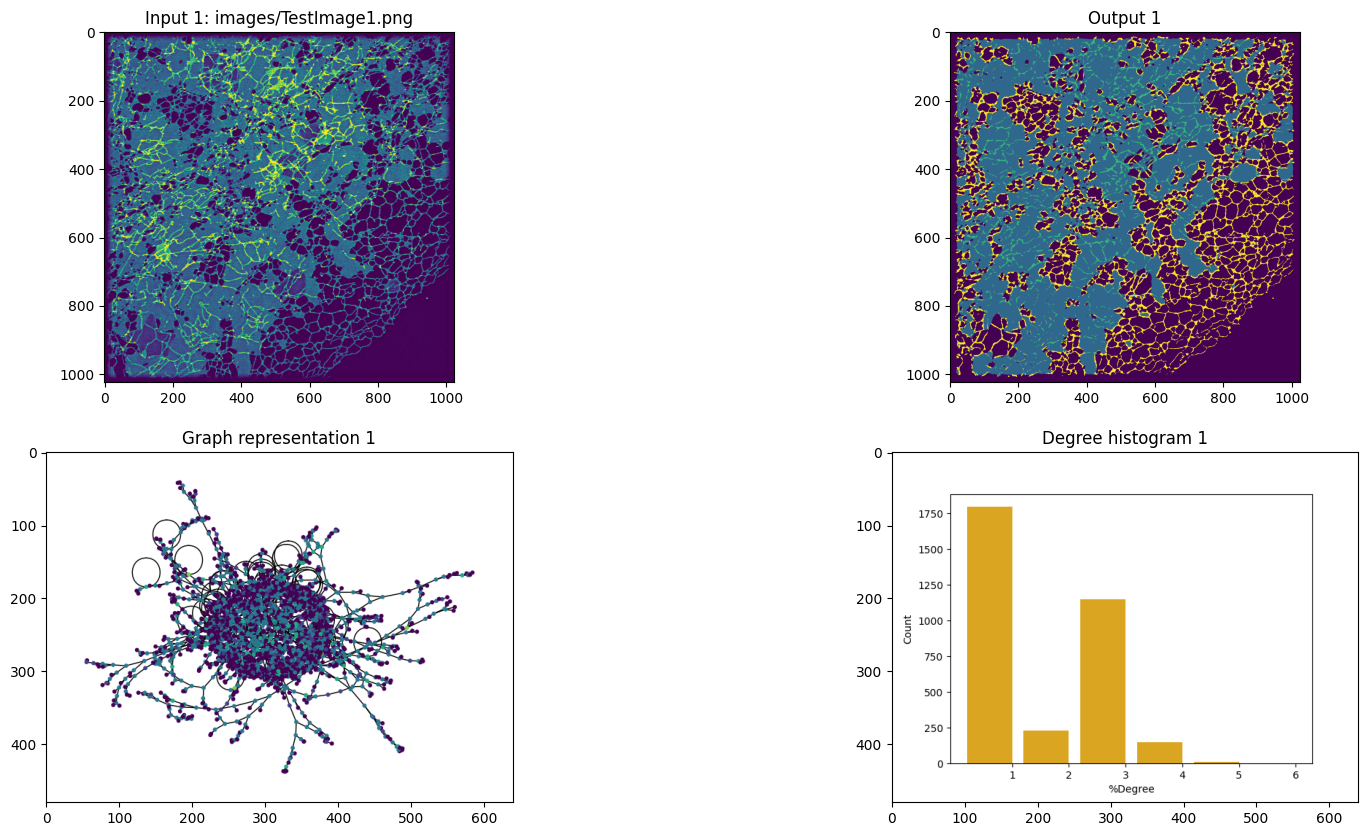

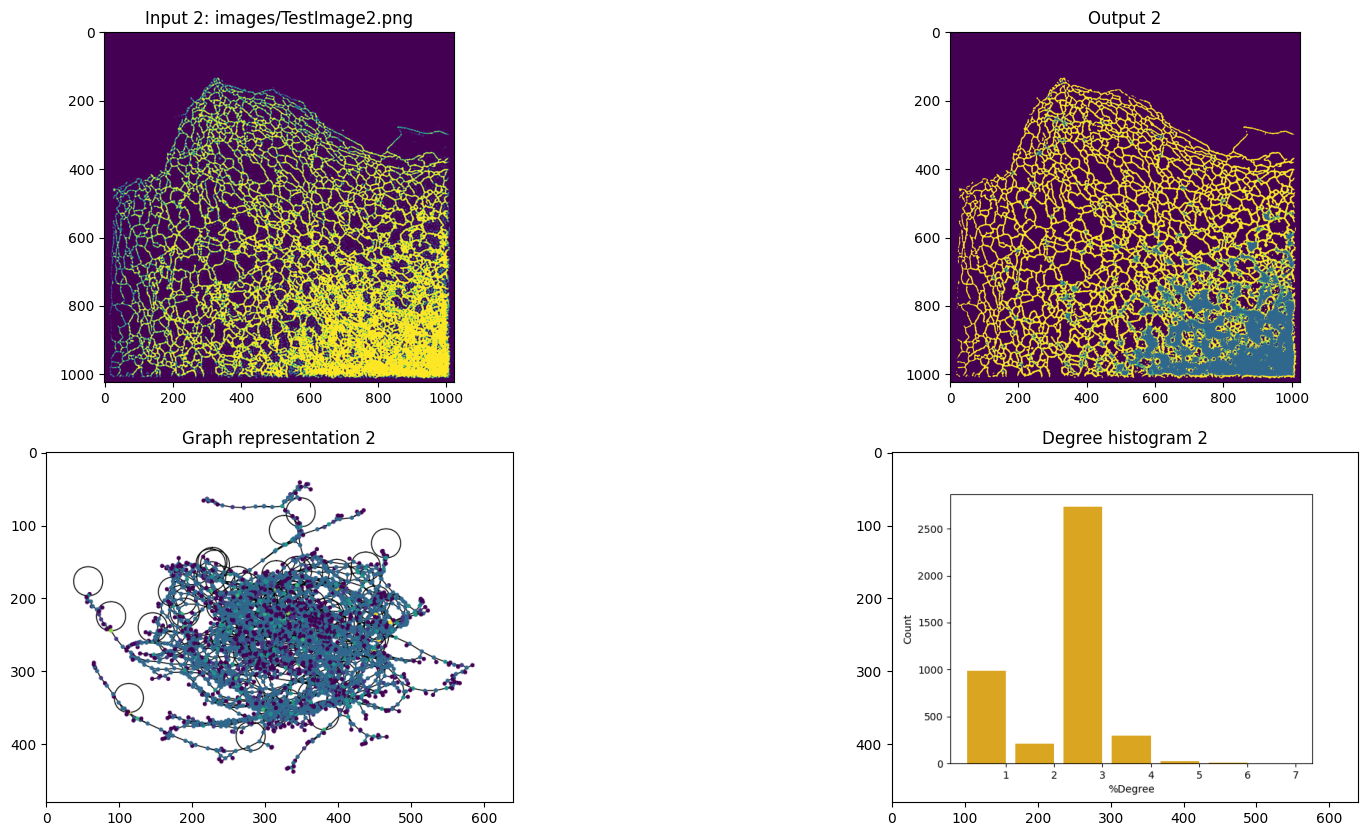

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.clf()

# output files per input file
n = len(outpaths)//len(filepaths)

for idx, inpath in enumerate(filepaths):

    outpath = [outpaths[i] for i in range(idx*n, (idx+1)*n )]

    plt.figure(figsize=(20,10))
    plt.subplot(221)
    plt.imshow(io.imread(inpath))
    plt.title('Input %d: %s' % (idx+1,inpath))
    plt.subplot(222)
    plt.imshow(io.imread(outpath[0]))
    plt.title('Output %d' % (idx+1))

    plt.subplot(223)
    plt.imshow(io.imread(outpath[1]))
    plt.title('Graph representation %d' % (idx+1))
    plt.subplot(224)
    plt.imshow(io.imread(outpath[2]))
    plt.title('Degree histogram %d' % (idx+1))
plt.show()

<a id='batch'></a>
## b. Example of batch processing

`TestImage3-stack.tif` consists of 5 frames

`TestImage4-stack.tif` consists of 30 frames

In [ ]:
exportdir = 'output'
filepaths = ['images/TestImage3-stack.tif','images/TestImage4-stack.tif']
model = 'models/20220306_ER_4class_swinir_nch1.pth'
weka_colours = False
stats_tubule_sheet = True
graph_metrics = True
save_in_original_folders = True
outpaths = segment(exportdir,filepaths,weka_colours,stats_tubule_sheet,graph_metrics,save_in_original_folders,model)

{'root': ['images/TestImage3-stack.tif', 'images/TestImage4-stack.tif'], 'ext': ['jpg', 'png', 'tif'], 'stats_tubule_sheet': True, 'graph_metrics': True, 'weka_colours': False, 'save_input': 'models/20220306_ER_4class_swinir_nch1.pth', 'exportdir': 'output', 'jobname': '20251201150623713', 'csvfid': <_io.TextIOWrapper name='output/20251201150623713_stats_tubule_sheet.csv' mode='w' encoding='utf-8'>, 'graphfid': <_io.TextIOWrapper name='output/20251201150623713_graph_metrics.csv' mode='w' encoding='utf-8'>, 'imageSize': 600, 'n_resblocks': 10, 'n_resgroups': 3, 'n_feats': 64, 'reduction': 16, 'narch': 0, 'norm': None, 'nch_in': 1, 'nch_out': 4, 'cpu': False, 'weights': 'models/20220306_ER_4class_swinir_nch1.pth', 'scale': 1, 'out': 'root'}
LOADING: Transformer architecture
loading checkpoint models/20220306_ER_4class_swinir_nch1.pth


/tmp/ipython-input-1725556100.py:35: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  opt.jobname = datetime.datetime.utcnow().strftime("%Y%m%d%H%M%S%f")[:-3]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

images/TestImage3-stack/in : [5/5] loaded imgs
saved stack: images/TestImage3-stack/TestImage3-stack_in.tif
images/TestImage3-stack/out : [5/5] loaded imgs
saved stack: images/TestImage3-stack/TestImage3-stack_out.tif


  0%|          | 0/30 [00:00<?, ?it/s]